# Exploration of Data
## Data Science 410

This notebook contains an introduction to the methods data scientists used to prepare and explore a data set. Data scientists spend a lot of time manipulating data to clean and prepare it (**data munging**) and to understand the relationships within the variables in the data (**data exploration**). Visualization is a key skill for any data scientist performing these tasks. 

Before performing any type of inference or machine learning on a data set, you should develop an understanding of the relationships in the data set. Skipping this step can lead wasted time from unexpected problems when building models, or in constructing models with poor performance. When starting any data science project, it is a good idea to plan on spending considerable time exploring the data. These exploration steps are often performed in conjunction with data cleaning and preparing, as visualization often highlights problems with data. 

These lessons are divided into several parts. In each part you will learn how to use the visualization tools available in Python.

- **Summarizing and manipulating data**:
  * How large is it?
  * What columns are of interest?
  * Missing data?
  * What are the characteristics of the data derived from summary statistics and counts?
- **Overview of Matplotlib, Pandas plotting and Seaborn** which are commonly used Python plotting packages. 
- **Overview of univariate plot types** is a review of creating these basic plots using three Python packages. These plot types allow you to study the distributional properties of the variables in your data set. 
- **Using Matplotlib methods** to add attributes to plots, such as titles and axis labels. 

***
**Important!**  

This notebook was constructed using the Anaconda 3.5 Python distribution. If you are not running version Anaconda 3.5 or higher, we suggest you update your Anaconda distribution now.  You can download the Python 3 Anaconda distribution for your operating system from the [Continuum Analytics web site](https://www.continuum.io/downloads)

To run this notebook you need the Seaborn graphics packages. If you have not done so, you will need to install Seaborn as it is not in the Anaconda distribution as of now. From a command prompt on your computer type the following command. If no errors occur, you will have installed Seaborn.

``pip install seaborn``

or

``conda install seaborn``

You can find more about installing ```seaborn``` can be seen on the [Installing and getting started](http://seaborn.pydata.org/installing.html) page.

***

## About the data set

This data set is from the [University of California Irving Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)  The data was compiled by Jeffrey C. Schlimmer from the following sources:

- 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 
- Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038 
- Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037


## Load and examine the data set

Let's get started. The function shown in the cell below loads the data from the .csv file. Some minimal clean up is performed on the data. Rows with missing values are dropped and some columns are converted from strings containing numbers to numeric data. The result is a Pandas data frame.

Execute the code in this cell to load the data into your notebook. **Make sure you have the .csv file in your working directory!**

In [3]:
def read_auto_data(fileName = "Automobile price data _Raw_.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price
auto_price = read_auto_data()

Notice that there are some missing values in the numeric columns by the following steps:
1. A list of the columns with the missing values is created.
2. These data are coded by the `"?"` string. Each case where this string  occurs is replaced by a numpy `nan`, a missing value. 
3. Then rows containing `nan` removed from the data frame. 
4. The type of these columns is then coerced to numeric. 

Next, have a first look at the dimensions and data types of the column of the data frame.

In [ ]:
print(auto_price.shape)
print(auto_price.dtypes)

Some key things to notice here are:

- There are 195 rows or cases in the data set.
- The data set has 26 variables or columns.
- Columns have a type of either `object` (character), `float64` (floating point number), or `int64` (integer). 


### Summary statistics

You can also learn a lot about a data set by looking at statistical summaries. The Pandas `describe` method does just this. Execute the code in the cell below and note the result.

In [4]:
auto_price.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Notice, that summary statistics are only provided for numeric columns. For these column this summary provides some useful information:

- The minimum and maximum values of each variable are displayed.
- The quantiles are shown; 25%, 50% (median), 75%. Note that, for several of theses variables, the upper interquartile ranges (IQR) are different from the lower IQR, indicating the distributions are skewed. 
- The mean is displayed. Compare the mean and the median, noting that the are often quite different. Again this is a sign of a skewed distribution. 
- The standard deviation gives a measure of the dispersion of the values. 

### Examine the data frames

Next, let's look at the first and last few lines of the data frame using the `head` and `tail` methods. Execute the code in the cells below to examine the first 10 rows and last 5 rows (the default) of the data frame, using the `head` and `tail` methods.

In [5]:
auto_price.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [6]:
auto_price.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


Examine these result to get feel for the data contained in the columns of this data frame.

### Frequency tables

The summary techniques we have used so far are suitable only for numeric variables. Categorical variables have values which are typically unordered. Therefore, we need a method to summarize categorical based on counts.  

The Pandas `group_by` method lets you subset a data frame by a list of columns. The data are grouped into a hierarchy by the order of the columns specified. Notice that the `groupby` operation only makes sense for categorical variables. 

The Pandas `agg` or aggregation method can be used to compute summary statistics. In this case, we will use the `count` operator. The frequency table shows the count of each category of the variable. 

To ensure the results display in an easy to understand manner, we will create a new column in the dataframe called `counts`. This column contains integer `1` values. The number of elements in each group can be counted, or simply summed.  

Execute the following code to show the number of cars in the data set by unique manufacturer.

***
**Code note:** 

Operations on Pandas data frames can be applied using methods. The methods can be chained using the `.` operator.  

The second line of code below performs several operations:
1. The required columns are sub-setted using the `[]` operator on the list of column names.
2. The `groupby` method is applied to the sub-setted data frame. The argument to `groupby` is the list of column names.
3. The `agg` method is applied to the grouped data. The operations to apply to the groups are the arguments to this method. 
***

In [7]:
auto_price['counts'] = 1
auto_price[['counts', 'make']].groupby(['make']).agg('count')

,counts
make,
alfa-romero,3
audi,6
bmw,8
chevrolet,3
dodge,9
honda,13
isuzu,2
jaguar,3
mazda,13


Examine this result. The name of the `make` is in one column and the count is in the other. Notice that some manufactures like alfa-romero and chevrolet have only three cars types in the sample. Toyota has the most cars in this sample. 

Or, you can look at the frequency of a combination of two categorical variables. The groups are organized by the order of the columns specified. Execute the code in the cell below and examine the results:

In [8]:
auto_price[['counts', 'fuel-type', 'make']].groupby(['make', 'fuel-type']).agg('count')

,,counts
make,fuel-type,
alfa-romero,gas,3
audi,gas,6
bmw,gas,8
chevrolet,gas,3
dodge,gas,9
honda,gas,13
isuzu,gas,2
jaguar,gas,3
mazda,diesel,2


Examine this result. The data are grouped first by `make` and then by engine `fuel-type`. This table gives us a feel for which manufactures only make gas cars and which ones make both gas and diesel cars, and how many of each. Notice that groups with counts of zeros do not display in the table. 

Frequency tables with multiple levels of grouping can be easily displayed. Execute the code in the cell below and examine the result. 

In [9]:
auto_price[['counts', 'fuel-type', 'aspiration', 'make']].groupby(['make', 'fuel-type', 'aspiration']).agg('count')

counts
make          fuel-type aspiration        
alfa-romero   gas       std              3
audi          gas       std              5
                        turbo            1
bmw           gas       std              8
chevrolet     gas       std              3
dodge         gas       std              6
                        turbo            3
honda         gas       std             13
isuzu         gas       std              2
jaguar        gas       std              3
mazda         diesel    std              2
              gas       std             11
mercedes-benz diesel    turbo            4
              gas       std              4
mercury       gas       turbo            1
mitsubishi    gas       std              7
                        turbo            6
nissan        diesel    std              1
              gas       std             16
                        turbo            1
peugot        diesel    turbo            5
              gas       std              5
                        turbo            1
plymouth      gas       std              5
                        turbo            2
porsche       gas       std              4
saab          gas       std              4
                        turbo            2
subaru        gas       std             10
                        turbo            2
toyota        diesel    std              2
                        turbo            1
              gas       std             29
volkswagen    diesel    std              2
                        turbo            2
              gas       std              8
volvo         diesel    turbo            1
              gas       std              6
                        turbo            4

Notice that with three levels the table takes a bit more effort to examine. As the number of grouping levels increases, frequency tables become progressively more difficult to understand. 

**Your turn:** In the cell below, create and execute the code to create a frequency table of autos by body style and number of doors.

In [14]:
auto_price[['counts', 'body-style', 'num-of-doors']].groupby(['body-style', 'num-of-doors']).agg('count')

counts
body-style  num-of-doors        
convertible two                6
hardtop     two                8
hatchback   four              10
            two               53
sedan       ?                  2
            four              78
            two               14
wagon       four              24

Examine your results and answer these questions. 
1. Which body style and door configuration is the most frequent? 
2. Ignoring missing values, which body style and door configuration is the least frequent? 

## Exploration and Visualization of Data

### Why visualization?

Visualization is an essential method in any data scientist’s toolbox. Visualization is a key first step in the exploration of most data sets. As a general rule, you should never start creating models until you have examined the data and understand the relationships. Otherwise, you risk wasting your time creating models blindly. Visualization is also a powerful tool for presentation of results and for determining sources of problems with analytics. 

The concepts of exploring a data set visually were pioneered by John Tukey in the 1960s and 1970s. Tukey consolidated his many ideas on data exploration into a book in the late 1970s, ***John Tukey, Exploratory Data Analysis, 1977, Addison-Westley***.

![](img/Tukey.jpg)

Bill Cleveland documented his seminal work in visualization of complex data sets in his book, ***William S. Cleveland, Visualizing Data, 1993, Hobart Press***.

![](img/Cleveland.jpg)

The key concept of exploratory data analysis (EDA) or visual exploration of data is to understand the relationships in the data set. Specifically using visualization when you approach a new data set you can:

- Explore complex data sets, using visualization to develop understanding of the inherent relationships.
- Use different chart types to create multiple views of data to highlight different aspects of the inherent relationships.
- Use plot aesthetics to project multiple dimensions. 
- Apply conditioning or faceting methods to project multiple dimensions




### The confusing world of Python graphics libraries. 

There are a number of powerful charting packages available for the Python language. This situation can lead to confusion as to which package to use for which situation. Below is an outline to help you understand the organization of Python grapics choices:
https://bokeh.pydata.org/en/latest/
- **Matplotlib:** [Matplotlib](https://matplotlib.org/users/index.html) is a low-level scientific and technical charting package. A number of other Python charting libraries are built on top of Matplotlib. As a result, a bit of knowledge of Matplotlib will help you set the attributes of plots created with several other packages. An extensive [tutorial](https://matplotlib.org/tutorials/index.html) is available for Matplotlib.
- **Pandas plotting:** The [visualization methods for Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html) provides a simple interface for common plot types for data in data frames. As with many other Python plotting libraries Pandas visualization is built on top of Matplotlib. You can use common Matplotlib methods with Pandas visualization. 
- **Seaborn:** The [Seaborn](https://seaborn.pydata.org/) package privides high-level api for statistical graphics. As with many other Python plotting libraries Seaborn is built on top of Matplotlib. You can use common Matplotlib methods with Seaborn.  A [tutorial](https://seaborn.pydata.org/tutorial.html) with useful examples is available for Seaborn.   
- **Other packages:** There are a number of other sophisticated and useful Python graphics packages. Unfortunately, we do not have time in this course to cover these packages. The Python [ggplot](http://ggplot.yhathq.com/) package provideds a high-level graphics interface based on the grammar of graphics used in the R ggplot2 package.  There are two powerful Python interactive graphics packages which are widely used, [plotly](https://plot.ly/python/) and [Bokeh](https://bokeh.pydata.org/en/latest/).

### Basic chart types

Now that you have loaded and had a first look at the data, its time to get to work making some charts.   

There are enumerable chart types that are used for data exploration. When exploring a data set you need to examine multiple views. This process will require using multiple chart types. 

All computer data graphics are projected onto a 2-dimensional surface.  This is a fundamental restriction on data visualization we must learn to work with. Very broadly, plots are one-dimensional (univariate) or 2-dimensional (bi-variate). We will study plots of both types in this lesson.   

In this lesson you will work with a number of common chart types. The list below indicates the plots we will explore and an indication about the dimensionality of the plot:

- **Bar plots** - 1d
- **Histograms** - 1d
- **Box plots** - 1d +
- **Kernel Density Estimation Plots** - 1d +
- **Violin plots** -1d +
- **Scatter plot** - 2d
- **2d Kernel Density Plots** -2d
- **Hexbin plots** - 2d
- **Line plots** - 2d

The following exercises give you some practice using these chart types. 

### Bar plots

To start our exploration of of these data we will work with bar plots. Bar plots are used to display the counts or frequency of unique values of a categorical variable. The height of the bar represents the count for each unique category of the variable. 

The code below uses chain of Pandas methods to display a barplot of the counts by body style. This chain performs the following operations:
1. The required columns are selected using the `loc` method. The `loc` method selects rows, or columns by name, not index number (use `iloc`). In this case we are selecting columns by a list of two names.
2. The `groupby` method groups the data in the order of the columns in the list.
3. The `agg` method performs aggregation on the groups. In this case we are only applying a count operation.
4. The Pandas `plot.bar` method creates the bar plot. Notice how the `bar` method of `plot` specifies the plot type. This syntax can be used for all Pandas plot types.

The Jupyter 'magic' command `matplotlib inline` tells the interpreter to display matplotlib graphics inline in the notebook.

Execute this code to create the bar plot.

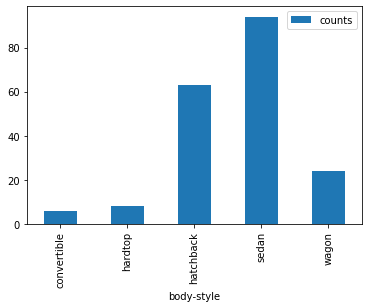

In [15]:
%matplotlib inline
auto_price.loc[:, ['body-style', 'counts']].groupby(['body-style']).agg('count').plot.bar()

From this display you can see that sedan is the most frequent body type is sedan and the least frequent is convertible. 

It would be easier to understand this plot if the frequencies of the categories were ordered. This would be particularly true if there were a large number of categories or categories with similar counts. 

The code in the cell below adds a `sort_values` operation to the chain of methods. The counts will be ordered from lowest to highest. 

Execute the code in the cell below to create an ordered bar plot.

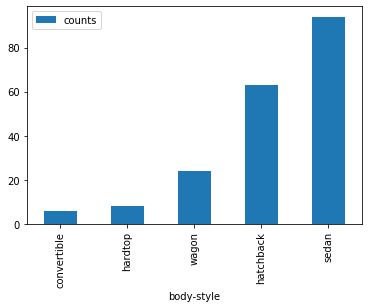

In [17]:
auto_price.loc[:, ['body-style', 'counts']].groupby(['body-style']).agg('count').sort_values('counts').plot.bar()

**Your turn!** In the cell below, create and execute the code to create a sorted bar chart of the number of doors. 

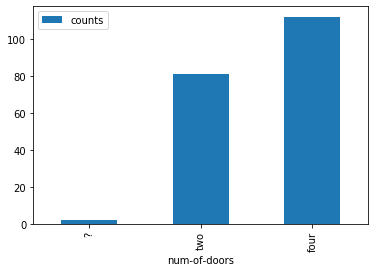

In [19]:
auto_price.loc[:, ['num-of-doors', 'counts']].groupby(['num-of-doors']).agg('count').sort_values('counts').plot.bar()

Examine your plot and answer the following questions:
1. Is there evidence of missing values? 
2. Which number of doors is the most common? 

### Histograms

Histograms are related to bar plots. Histograms are used for numeric variables. Whereas, a bar plot shows the counts of unique categories, a histogram shows the number of data with values in each bin. The bins divide the values of the variable into equal segments. The vertical axis of the histogram shows the count of data values within each bin.  

The code in the cell below uses the Pandas `plot` method once again, but with the `hist` method this time. The optional `bins = 30` argument customizes the appearance of the histogram. Notice that the use of the Pandas plotting method is a variation on the bar plots you just created. 

Execute this code and examine the result. 

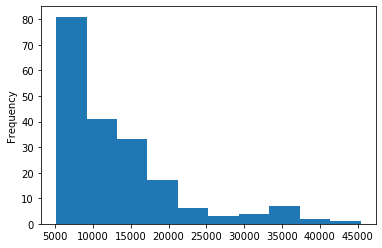

In [23]:
auto_price.loc[:,'price'].plot.hist(bins = 10)

The histogram shows that the price of automobiles are skewed toward the lower end, with only a few high priced autos.

### Box plots

Box plots, also known as box and whisker plots, were introduced by John Tukey in 1970. Box plots are another way to visualize the distribution of data values. In this respect, box plots are comparable to histograms, but are quite different in presentation. 

A diagram showing the interpretation of a box plot is shown in the figure below.

![Interpretation of a box plot](img/BoxPlot.png)

At first glance the interpretation of a box plot is a bit intimidating. The box plot is read in the following manner:

1. The bold line in the box shows the median of the distribution. 
2. The upper and lower middle quartiles of the distribution define the upper and lower limits of the box.
3. The length of the the whiskers is the lesser of +/-2.5 times the inter-quartile range (about 2.7 times the standard deviation) or the most extreme values of the data. 
4. Outliers are shown by symbols, such as `+` or `*`, beyond the whiskers.

Box plots are best used to compare distributions of a variable grouped by another variable. In this case, several box plots can be stacked along an axis. The data are divided using a 'group by' operation, and the box plots for each group are stacked next to each other. In this way, the box plot allows you to display two dimensions of your data set. 

The code in the cell below uses the matplotlib box-plot method. The only argument is the single data vector. Execute the code in the cell below to create a basic box plot of the price of the automobiles.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa821151828>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa821151f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa821151400>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa82115e5f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa82115e940>],
 'means': []}

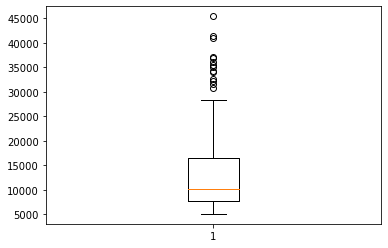

In [24]:
import matplotlib.pyplot as plt
plt.boxplot(auto_price.loc[:,'price'])

Compare the above plot to the histogram of price. You can see from both plots that the distribution of price is quite asymmetric. Further, there are a significant number of high-priced cars that appear as outliers. 

The above plot, is quite basic. Most importantly, this plot lacks the annotation required for someone to quickly understand it. At the minimum a title and an axis label are required. Fortunately, adding these attributes to the plot is relatively easy, since matplotlib provides methods to do so. 

There is another issue with this plot. Notice that the limits of the y axis is $\{ 5000, 50000 \}$. The fact that this limit does not include `0` can distort the observer's view of the data. This is particularly the case when making comparisons between variables, of subsets of variables. In general, the vertical axis limit of  plots should include `0`.

It will also be useful to have control of other plot attributes like overall size. 

The basic recipe is as follows:

1. A matplotlib figure object is created. The `figsize` arguments sets the size of the plot area.
2. A axis object is created for the figure.
3. The box plot is added to the axis object.
4. Title text is added to the axis object.
5. A y axis label is added to the axis object. 
6. The limits for the y axis are set to include 0. 

***
**Note:** There are many other attributes which can be set by with matplotlib. 
***

Execute the code to create the plot and examine the results.

(0.0, 50000.0)

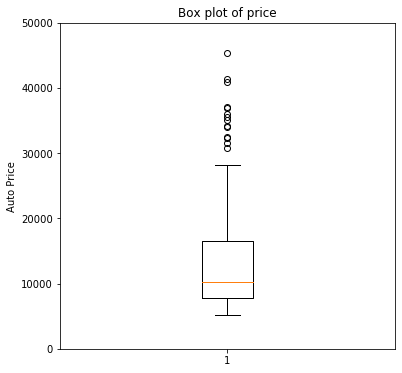

In [25]:
fig = plt.figure(figsize=(6, 6)) # define plot area
ax = fig.gca() # define axis 
plt.boxplot(auto_price.loc[:,'price'])
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set  text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

Box plots are most useful when the data are subdivided or grouped using another variable. The `by` argument allows you to group the data in a set of box plots by one or more categorical variables. 

For the code in the cell below we will use the Pandas `boxplot` method directly. Notice the `ax = ax` argument which places on the plot on the axis which has been defined. The matplotlib methods can then be used on this axis to add attributes to the plot. 

Execute the code below to display the box plots of price grouped by the `fuel.type` variable.

(0.0, 50000.0)

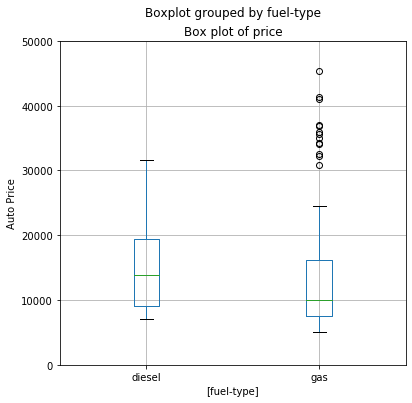

In [26]:
fig = plt.figure(figsize=(6, 6)) # define plot area
ax = fig.gca() # define axis 
auto_price.loc[:,['price', 'fuel-type']].boxplot(by = 'fuel-type', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

Examine these box plots and note the following:

- The median price of gas autos is less than the the median price for diesel autos.
- There is considerable overlap between the interquartile ranges of the price distributions of gas and diesel autos. 

**Your turn!** In the cell below create and execute the code to display a box plot of auto price grouped by both `fuel-type` and `aspiration`. You will need to include the following in your code:

1. Define figure and axis object.
2. Add a box plot to the axis using the Pandas boxplot method. The `by` argument will be a list of column names.
3. Set some attributes of your plot, including a title, an x-axis label and a y-axis label.

(0.0, 50000.0)

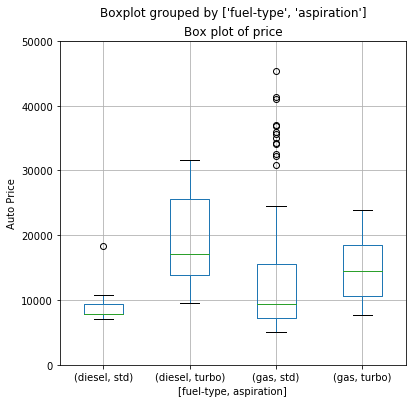

In [27]:
fig = plt.figure(figsize=(6, 6)) # define plot area
ax = fig.gca() # define axis 
auto_price.loc[:,['price', 'fuel-type', 'aspiration']].boxplot(by = ['fuel-type','aspiration'], ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

Examine this plot and answer the following questions. 
1. Are turbo diesel cars generally more expensive that standard gas and diesel cars, and why? 
2. Which type of car shows the greatest price range and the most outliers? 

### Kernel density estimation plots

You have used two methods for visualizing distributions. Now, you will look at another method, kernel density estimation. Kernel density estimation uses a moving window density estimation kernel to average the density of the distribution. The result is a smoothed estimate of the probability density of the variable.

In the cell below we will use the Python `seaborn` package to plot the kernel density estimation plot. The code uses the following recipe to create and display the plot:
1. Define a figure and an axis on that figure.
2. A seaborn grid is defined, with the style as the argument.
3. The seaborn `kdeplot` method is used on the vector of values to be plotted.
4. Add plot attributes using matplotlib methods.

Notice that, once again, we add attributes to the plot using matplotlib methods. 

***
**Note:** Depending on which version of the numpy and statsmodels packages you are running, you may get a depreciation warning.
***

Execute the code in the cell below to compute and plot a kernel density estimate of auto price. 

Text(0, 0.5, 'Density')

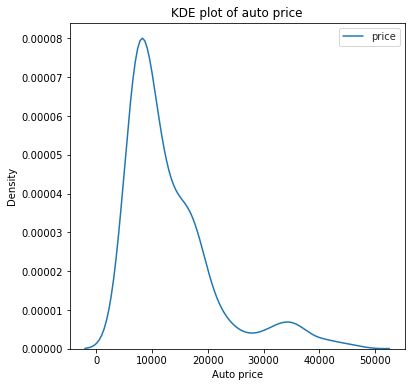

In [28]:
import seaborn as sns
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(auto_price.loc[:, 'price'], ax = ax)
ax.set_title('KDE plot of auto price') # Give the plot a main title
ax.set_xlabel('Auto price') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

Examine this plot. Notice that the distribution is heavily skewed to the left or low side. This finding is consistent with the other displays you have created with histograms and box plots.

### Violin plots

Violin plots are a useful, and relatively new, plot type. The violin plot combines some attributes of a kernel density plot and the box plot. The violin plot shows a pair of synthetic kernel density plot. The violin plot has the advantage, and perhaps disadvantage, of showing more . Like a box plot, the violin plot can be conditioned on a categorical (factor) variable, so distributions of a grouped variable can be compared. 

The code in the cell below creates a violin plot of auto price, grouped by fuel type. Notice that `price` is the y (or vertical) axis argument and the grouping variable, `fuel-type`, is the x (or horizontal) axis argument. 

As before, we use the matplotlib methods to add attributes to this plot.

Execute this code to create the plot. 

Text(0, 0.5, 'Fuel type')

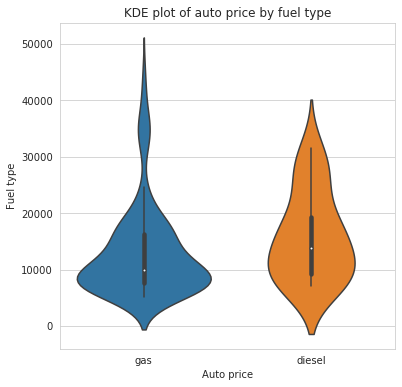

In [29]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'fuel-type', y = 'price', data = auto_price, ax = ax)
ax.set_title('KDE plot of auto price by fuel type') # Give the plot a main title
ax.set_xlabel('Auto price') # Set text for the x axis
ax.set_ylabel('Fuel type')# Set text for y axis

Examine this plot and  notice the following:
1. The price of gas and diesel cars overlap quite a lot. 
2. The outliers of price for gas cars are clearly visible.
3. The median (white dot), inner quartiles (black box), and whiskers at +/-2.5 of the IQR are all visible inside the violin. 

**Your turn!** In the cell below create and execute the code to display a violin of auto price grouped by `fuel-type` and `aspiration`. Seaborn allows you to group by the `x` variable and by `hue` (color). In this case, use the arguments `x = 'fuel-type'` and `hue = 'aspiration'`. You should also try the alternative display option, `split = True`, which shows split violin plots.  

Text(0, 0.5, 'Fuel type')

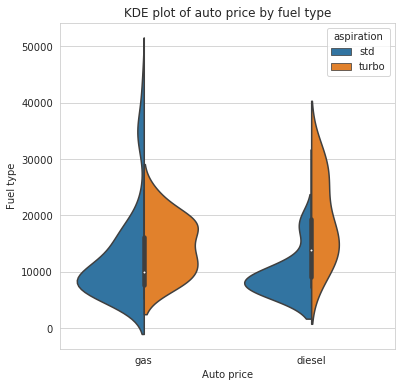

In [30]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'fuel-type', y = 'price', hue = 'aspiration', split = True, data = auto_price, ax = ax)
ax.set_title('KDE plot of auto price by fuel type') # Give the plot a main title
ax.set_xlabel('Auto price') # Set text for the x axis
ax.set_ylabel('Fuel type')# Set text for y axis

Examine your plot and answer the following questions. 
1. Which category of autos has the smallest range of prices? 
2. Are turbo diesel cars generally more expensive and why? 

## Summary

You have covered a lot of ground in this tutorial. You have explored many of the relationships in the auto price data set by creating multiple views to visualize these data. 

Specifically, in this tutorial you have:

- Applied multiple summary statistical and multiple plot views to develop an in-depth understanding of a data set.  
- Used Pandas methods to prepare and explore data. The Pandas package provides powerful methods for exploring a new data set.
- Examined the uses of and methods for creation of several univariate plot types using three different Python packages, matplotlib, Pandas, and seaborn. Univariate plots allow you to examine the distributional properties of the variables in your data set. The variable values can be grouped by one or more categorical variables for comparison.
- Used matplotlib methods to add attributes to matplotlib, Pandas and seaborn plots. 

#### The end!